In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import contextily as ctx

In [2]:
from owslib.wms import WebMapService
wms = WebMapService('http://mapservices.onemap.sg/mapproxy/service?REQUEST=GetCapabilities&SERVICE=WMTS', version='1.1.1')
wms.identification.title

'MapProxy WMS'

In [3]:
list(wms.contents)

['Default',
 'Original',
 'Grey',
 'Night',
 'singapore_3414_tms',
 'singapore_3414_wms',
 'singapore_3414_wmts',
 'singapore_landlot_wmts']

In [4]:
wms['Grey'].crsOptions

['EPSG:3414', 'EPSG:4326']

In [5]:
wms['Grey'].boundingBox

(103.359, 1.054, 104.766, 1.76, 'EPSG:4326')

In [6]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo']

In [7]:
xmin,xmax = 1000,54000
ymin,ymax = 14000,51000
ratio = (ymax-ymin)/(xmax-xmin)

img = wms.getmap(layers=['Grey'],
                 styles=[''],
                 srs='EPSG:3414',
                 bbox=[xmin,ymin,xmax,ymax],
                 size=[1000,int(1000*ratio)],
                 format='image/png',
                 transparent=True
                 )

In [8]:
with open('test.png','wb') as file:
    file.write(img.read())

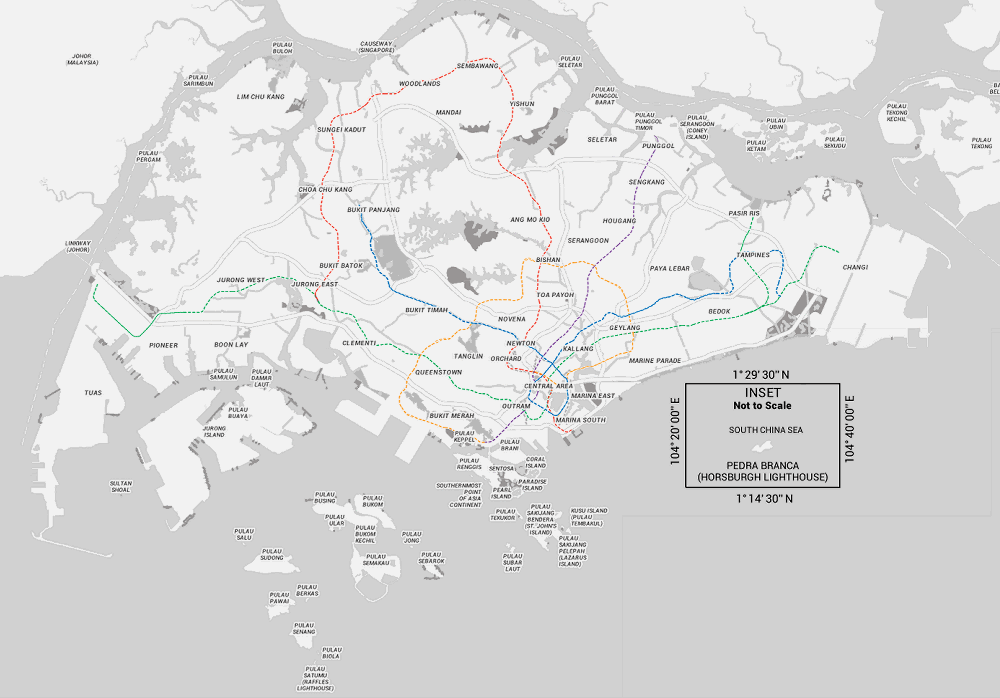

In [9]:
from IPython.display import Image
Image('test.png')

In [97]:
import numpy as np

def rgb2grey(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    grey = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return grey

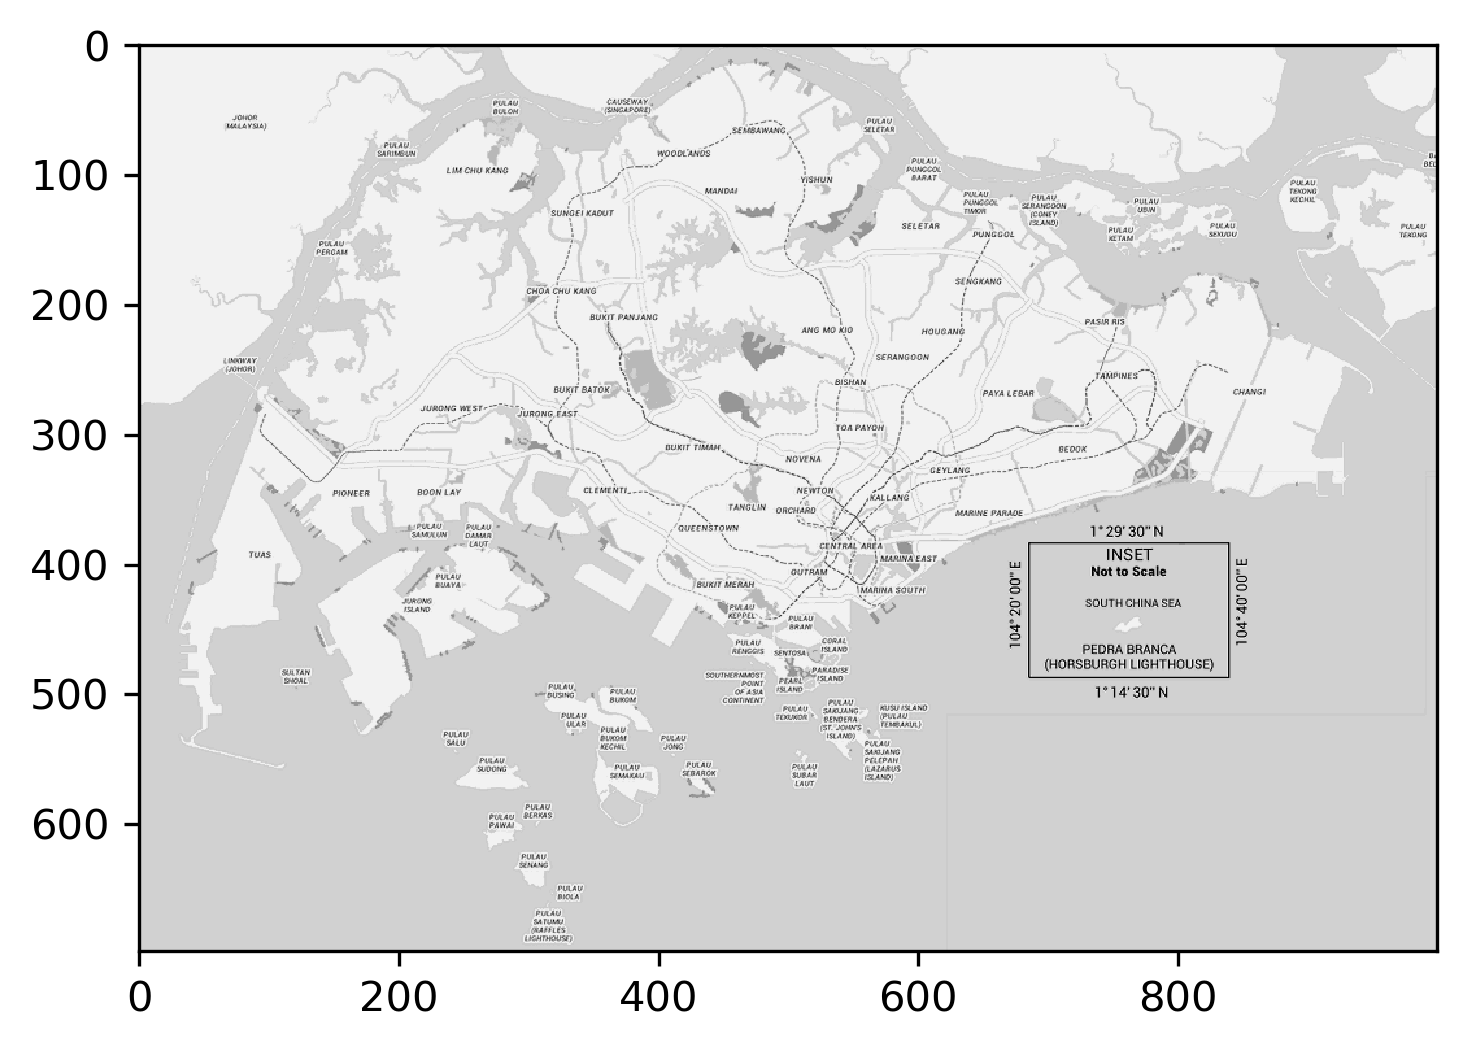

In [27]:
plt.figure(dpi=300)
data = rgb2grey(plt.imread('test.png'))
plt.imshow(data, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

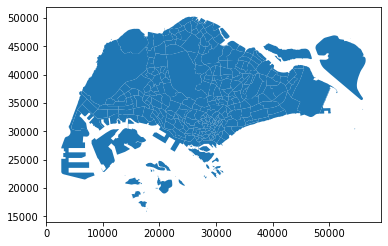

In [13]:
import geopandas as gpd

sz = gpd.read_file('subzones_ura/MP14_SUBZONE_WEB_PL.shp') #.to_crs('EPSG:4326')
sz.plot()

In [15]:
sz.total_bounds

array([ 2667.538 , 15748.721 , 56396.44  , 50256.3343])

In [16]:
sz.to_crs('EPSG:4326').total_bounds

array([103.60570071,   1.1586987 , 104.08848307,   1.47077483])

In [6]:
xmin, xmax = 1000, 54000
ymin, ymax = 13000, 50000

In [35]:
w, s, e, n = sz.to_crs('EPSG:4236').total_bounds

In [126]:
_ = ctx.howmany(w, s, e, n, 13, ll=True)

Using zoom level 13, this will download 96 tiles


In [127]:
%%time
#img, ext = ctx.bounds2img(w, s, e, n, 12, url='http://maps-b.onemap.sg/v2/Original/{z}/{x}/{y}.png', ll=True)
img, ext = ctx.bounds2img(w, s, e, n, 13, url=getattr(ctx.sources, 'ST_TERRAIN'), ll=True)

CPU times: user 640 ms, sys: 233 ms, total: 874 ms
Wall time: 4.95 s


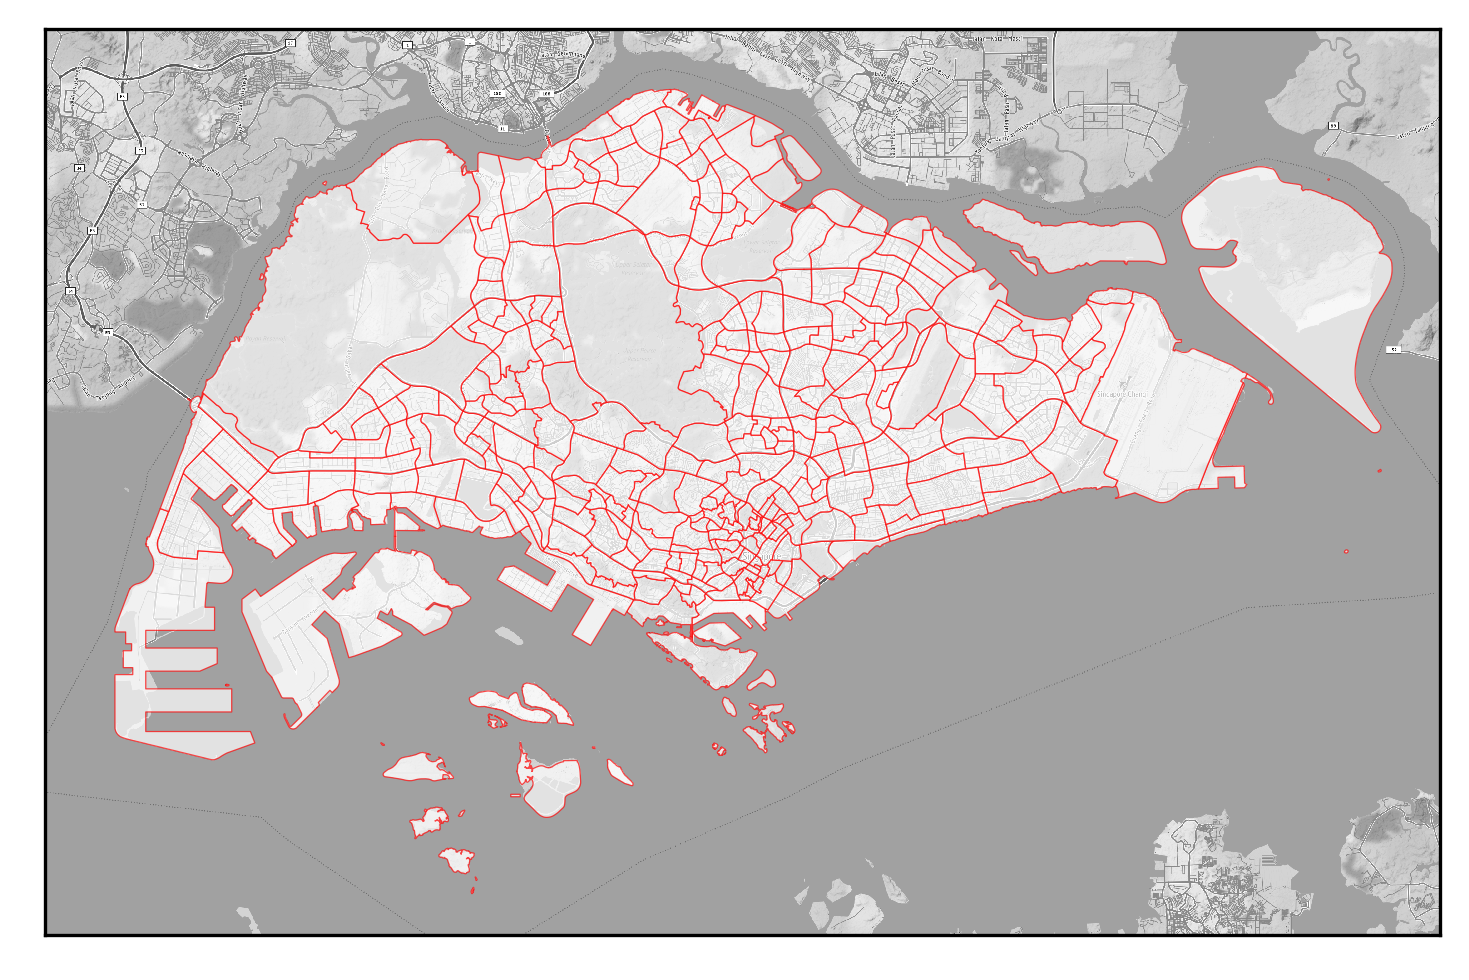

In [129]:
plt.figure(dpi=300)
ax = plt.axes()
data = rgb2grey(img)
ax.imshow(data, extent=ext, cmap=plt.get_cmap('gray'))
sz.to_crs('EPSG:3857').plot(ax=ax,facecolor='white',alpha=.7, edgecolor='red',lw=0.3)
plt.axis('tight')
plt.xticks([])
plt.yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
extents = ax.axis()
plt.show()
plt.close()

In [130]:
extents

(11530372.842762267, 11589076.480485283, 127191.2150665321, 166326.97354854314)

In [67]:
getattr(ctx.sources, 'ST_WATERCOLOR')

'http://tile.stamen.com/watercolor/{z}/{x}/{y}.png'

In [24]:
sources = [i for i in dir(ctx.tile_providers) if i[0] != '_']
sources'ST_TONER_LINES'

['OSM_A',
 'OSM_B',
 'OSM_C',
 'ST_TERRAIN',
 'ST_TERRAIN_BACKGROUND',
 'ST_TERRAIN_LABELS',
 'ST_TERRAIN_LINES',
 'ST_TONER',
 'ST_TONER_BACKGROUND',
 'ST_TONER_HYBRID',
 'ST_TONER_LINES',
 'ST_TONER_LITE',
 'ST_WATERCOLOR']

In [ ]:
http://maps-b.onemap.sg/v2/Grey/{z}/{x}/{y}.png 